In [196]:
import pandas as pd
import numpy as np
import seaborn as sns

In [197]:
submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [198]:
submission.info()
submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   0       10000 non-null  int64
 2   1       10000 non-null  int64
 3   2       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [199]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  float64
 11  DAYS_EMPLOYED  10000 non-null  float64
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     10000 non-null  object 
 17  family_size    10000 non-null  float64
 18  begin_m

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-1.238950e-06,-0.0,1,0,1,0,No job,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-1.068461e-06,-0.0,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-8.950977e-07,-0.0,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1.085701e-06,-0.0,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-1.004119e-06,-0.0,1,1,0,0,Managers,2.0,-8.0


In [200]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  float64
 11  DAYS_EMPLOYED  26457 non-null  float64
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-0.104327,-0.0,1,0,0,0,No job,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-0.085419,-0.0,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-0.143269,-0.0,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-0.113252,-0.0,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-0.112869,-0.0,1,0,0,0,Managers,2.0,-26.0,2.0


In [201]:
train.columns
### index : 지수
### gender : 성별
### car : 자동차 소유 여부
### reality : 부동산 소유 여부
### child_num : 자녀의 수
### income_total : 소득 총액
### income_type : 소득 유형
### edu_type : 최종학력
### family_type : 가족 유형
### house_type : 집 유형
### DAYS_BIRTH : 출생일
### DAYS_EMPLOYED : 업무 시작일(양수 값은 고용되지 않음을 뜻함)
### FLAG_MOBIL : 핸드폰 여부
### work_phone : 업무용 핸드폰 여부
### phone : 전화기 여부
### email : 이메일 여부
### occyp_type : 직업 유형
### family_size : 가족의 수
### begin_month : 신용카드 발급 월
### credit : 신용도 (낮을수록 높은 신용도)


Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [202]:
set(train['income_type'])
# 소득 분류 값

{'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working'}

In [203]:
set(train['edu_type'])
# 최종학력

{'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special'}

In [204]:
set(train['family_type'])
# 가족 유형

{'Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow'}

In [205]:
set(train['house_type'])
# 집 유형

{'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents'}

In [206]:
set(train['occyp_type'])
# 직업 유형

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'No job',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Waiters/barmen staff'}

In [207]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.0,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-0.119783,0.0,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,0.031538,0.0,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-0.188793,-0.0,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-0.145851,0.0,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-0.116697,0.0,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-0.093421,0.0,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-0.057834,-0.0,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [208]:
train.isnull().sum()
# occyp_type에서 결측치 8171개
# 직업이 없는 사람이 8171명 이란 뜻

,0
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


In [209]:
# train데이터의 'occyp_type'변수의 결측치들을 'No job'으로 바꾼다
train['occyp_type'] = train['occyp_type'].fillna('No job')

In [210]:
# DAYS_EMPLOYED 양수값은 고용되지 않음을 뜻하므로 양수를 0으로 바꾸자
train.loc[train['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED'] = 0

# DAYS_EMPLOYED 값을 연 단위로 바꾸자
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] * (-1) / 365

# DAYS_BIRTH 출생일을 만나이로 바꾸자
train['DAYS_BIRTH'] = train['DAYS_BIRTH'] * (-1) / 365

# begin_month을 양수로 바꾸자
train['begin_month']= (train['begin_month']*-1)


In [211]:
# test 데이터도 같이 변형하자
test['occyp_type'] = test['occyp_type'].fillna('No job')
test['occyp_type'] = test['occyp_type'].fillna('No job')
test.loc[test['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED'] = 0
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] * (-1) / 365
test['DAYS_BIRTH'] = test['DAYS_BIRTH'] * (-1) / 365
test['begin_month']= (test['begin_month']*-1)

In [212]:
# train 데이터의 카테고리 컬럼들을 추출 (숫자는 제외)
categories = train.select_dtypes(exclude='number')

# 추출한 변수들의 값들의 비율을 확인 value_counts(normalize=True)
for feature in categories:
  print(train[feature].value_counts(normalize=True))
  print('-'*50)

gender
F    0.668897
M    0.331103
Name: proportion, dtype: float64
--------------------------------------------------
car
N    0.620252
Y    0.379748
Name: proportion, dtype: float64
--------------------------------------------------
reality
Y    0.673924
N    0.326076
Name: proportion, dtype: float64
--------------------------------------------------
income_type
Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: proportion, dtype: float64
--------------------------------------------------
edu_type
Secondary / secondary special    0.680160
Higher education                 0.270703
Incomplete higher                0.038553
Lower secondary                  0.009714
Academic degree                  0.000869
Name: proportion, dtype: float64
--------------------------------------------------
family_type
Married                 0.687757
Single / not married    0.132139
Civ

In [213]:
# 전처리된 데이터를 각각 저장
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [214]:
# 모델링
# feature(예측을 위해 모델이 학습하는 변수들, 독립변수 x)
# target(모델이 예측하고자 하는 대상, 종속변수 Y)

#예측 문제 유형 정의
#회귀(regression) : target데이터가 연속적인 값을 가질때 (주택 가격 예측)
#분류(classification) : target데이터가 이산적인 값을 가질때 (이미지 분류)

In [215]:
# target 변수인 credit 0,1,2이므로 분류를 쓰는게 좋을 듯
train['credit'].value_counts(normalize=True)

,proportion
credit,
2.0,0.641343
1.0,0.236875
0.0,0.121783


In [216]:
#모델링 - 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
# 의사결정나무는 object타입의 데이터를 처리하지 못함
# 따라서 레이블 인코딩이 필요하다 (문자열 형태의 카테고리를 숫자로 변환하는 프로세스)

In [217]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [218]:
# LabelEncoder를 이용하여 object타입 변수들을 수치형 데이터로 변환
cols = train.select_dtypes(include=['object']).columns
for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.fit_transform(test[col])

In [219]:
#변환결과 확인
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,0.000286,0.0,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,0.000234,0.0,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,0.000393,0.0,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,0.000310,0.0,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,0.000309,0.0,1,0,0,0,10,2.0,26.0,2.0


In [220]:
x = train.drop('credit',axis=1)
y = train['credit'] # target

In [221]:
# 모델 성능을 확인해야 함
# valid 데이터셋을 사용
# Train : 모델을 훈련하는데 사용. 모델의 가중치를 업데이트하는데 사용
# Valid : 모델의 하이퍼파라미터 조정 및 성능 평가에 사용 (일반적으로 전체데이터의 10~20% 비율)
# Test : 최종 모델로부터 예측 결과를 만들어내는 데 사용

In [222]:
# Train 데이터셋으로부터 일부를 분리해서 Valid 데이터셋을 추가로 만들자
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2,random_state=42)

In [223]:
# 모델 학습 및 평가
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [224]:
# 모델은 문제의 종류에 따라 평가 방법이 달라짐 (일반적으론 정확도를 사용함)
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_valid)
acc = accuracy_score(y_valid,y_pred)
print(f"Accuracy:{round(acc,4)}")

Accuracy:0.6002


In [225]:
#데이터가 불균형한 경우도 있으므로
# 분류문제는 주로 평가를 위해 '오차 행렬'을 사용한다
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,y_pred,labels=[0,1,2])
print(cm)

[[ 179  151  320]
 [ 166  553  543]
 [ 351  585 2444]]


In [226]:
# 예측하기

pred = model.predict_proba(test)
submission.iloc[:,1:]=pred
submission

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,0,1,0
3,26460,0,1,0
4,26461,0,1,0
...,...,...,...,...
9995,36452,0,0,1
9996,36453,0,0,1
9997,36454,0,1,0
9998,36455,0,1,0


In [229]:
# EDA (Exploratory Data Analysis) = 데이터 살펴보기
# 데이터 시각화를 통해서 데이터들 사이의 패턴을 파악하는 작업
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
train.head()
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# matplotlib, seaborn 사용자 원하는대로 그래프 스타일 바꿀 수 있음
rc = {
    'axes.facecolor': 'F6F6F6',
    'figure.facecolor': '#B8B8B8',
    'axes.edgecolor': '#000000',
    'grid.color': 'C4C4C4',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'grid.alpha': 0.4
}

<Axes: xlabel='credit', ylabel='count'>

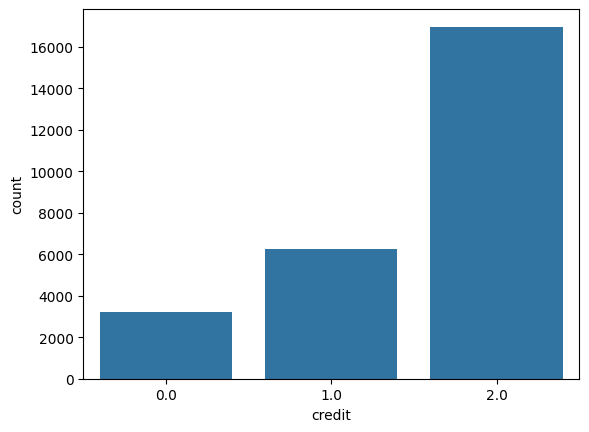

In [230]:
sns.countplot(train,x='credit')

In [231]:
# FLAG_MOBIL, work_phone, phone, email의 타입을 바꾸자
train['FLAG_MOBIL'] = train['FLAG_MOBIL'].astype('object')
train['work_phone'] = train['work_phone'].astype('object')
train['phone'] = train['phone'].astype('object')
train['email'] = train['email'].astype('object')

In [232]:
train_num = train.select_dtypes(include='number')
train_num['credit']= train['credit']
train_cat = train.select_dtypes(exclude='number')
train_cat['credit']=train['credit']

<ipython-input-233-3cf3844045a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_num,y=col,x='credit',order=[0,1,2],


UnboundLocalError: local variable 'boxprops' referenced before assignment

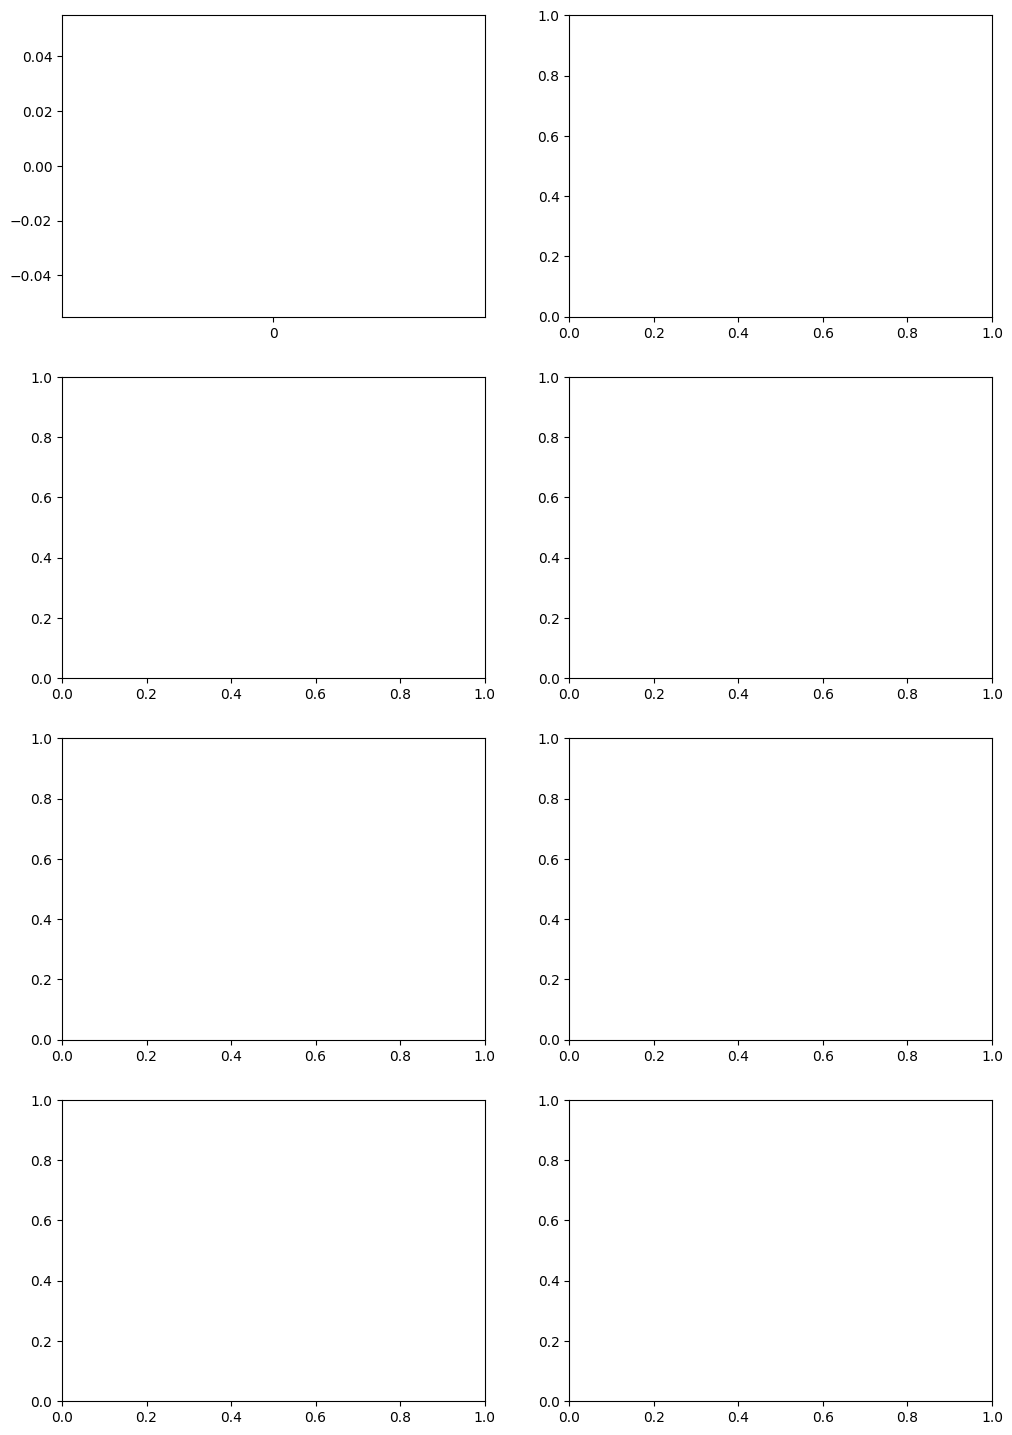

In [233]:
# 상자그래프 그리기 boxplot
fig,axes=plt.subplots(nrows=4, ncols=2, figsize=(12,18))
axes=axes.flatten()

color = ['#FA5858','#2EFE2E','#0040FF']

num_eda_cols = train_num.columns[:-1]

for i,col in enumerate(num_eda_cols):
 sns.boxplot(data=train_num,y=col,x='credit',order=[0,1,2],
               ax=axes[i], palette=color)
 axes[i].set_title(f"Credit Distribution({col})",pad=10)
 axes[i].set_xlabel('')
 axes[i].set_ylabel('')


plt.suptitle('/n<Credit Distribution for Numeric Columns>', fontsize=30)
plt.show()
## 뭐가 문제일까....

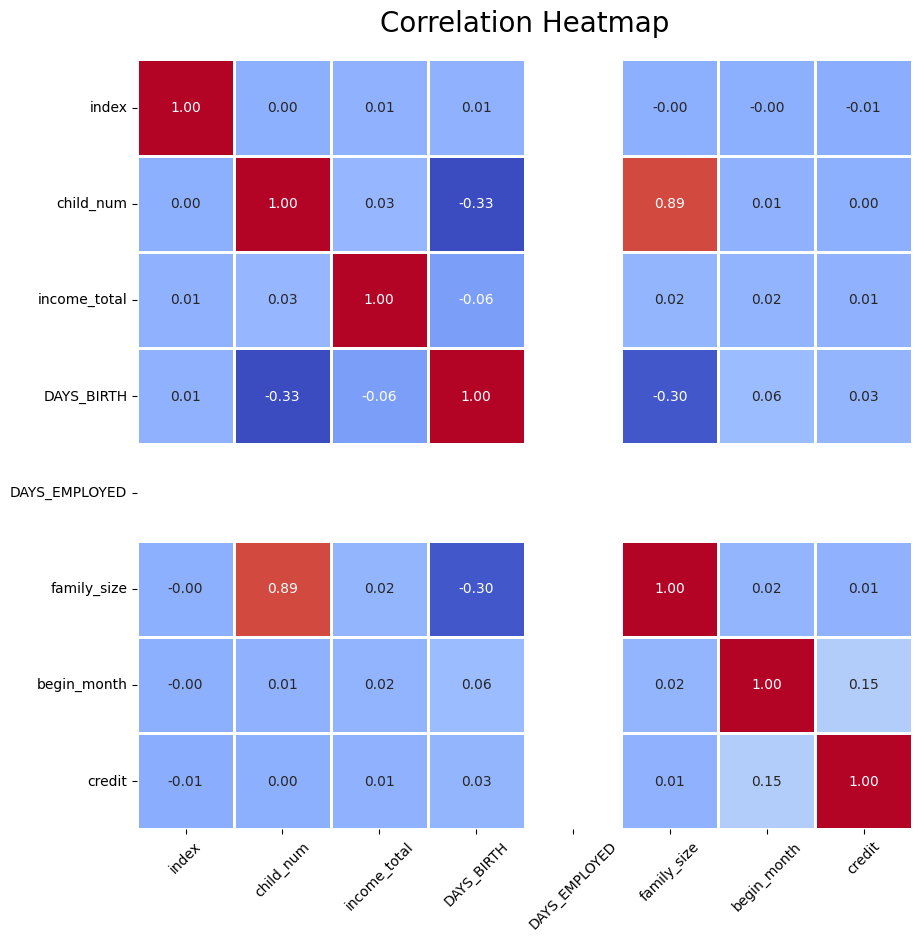

In [234]:
# heatmap 변수들의 상관관계를 보자
# corr()는 수치형 데이터의 상관관계를 반환해준다
plt.figure(figsize=(10,10))
sns.heatmap(train_num.corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, cbar=False)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap',pad=20, fontsize=20)
plt.show()

In [235]:
# child_num과 family_size는 양의 상관관계
# DAYS_BIRTH 와 child_num, family_size는 음의 상관관계

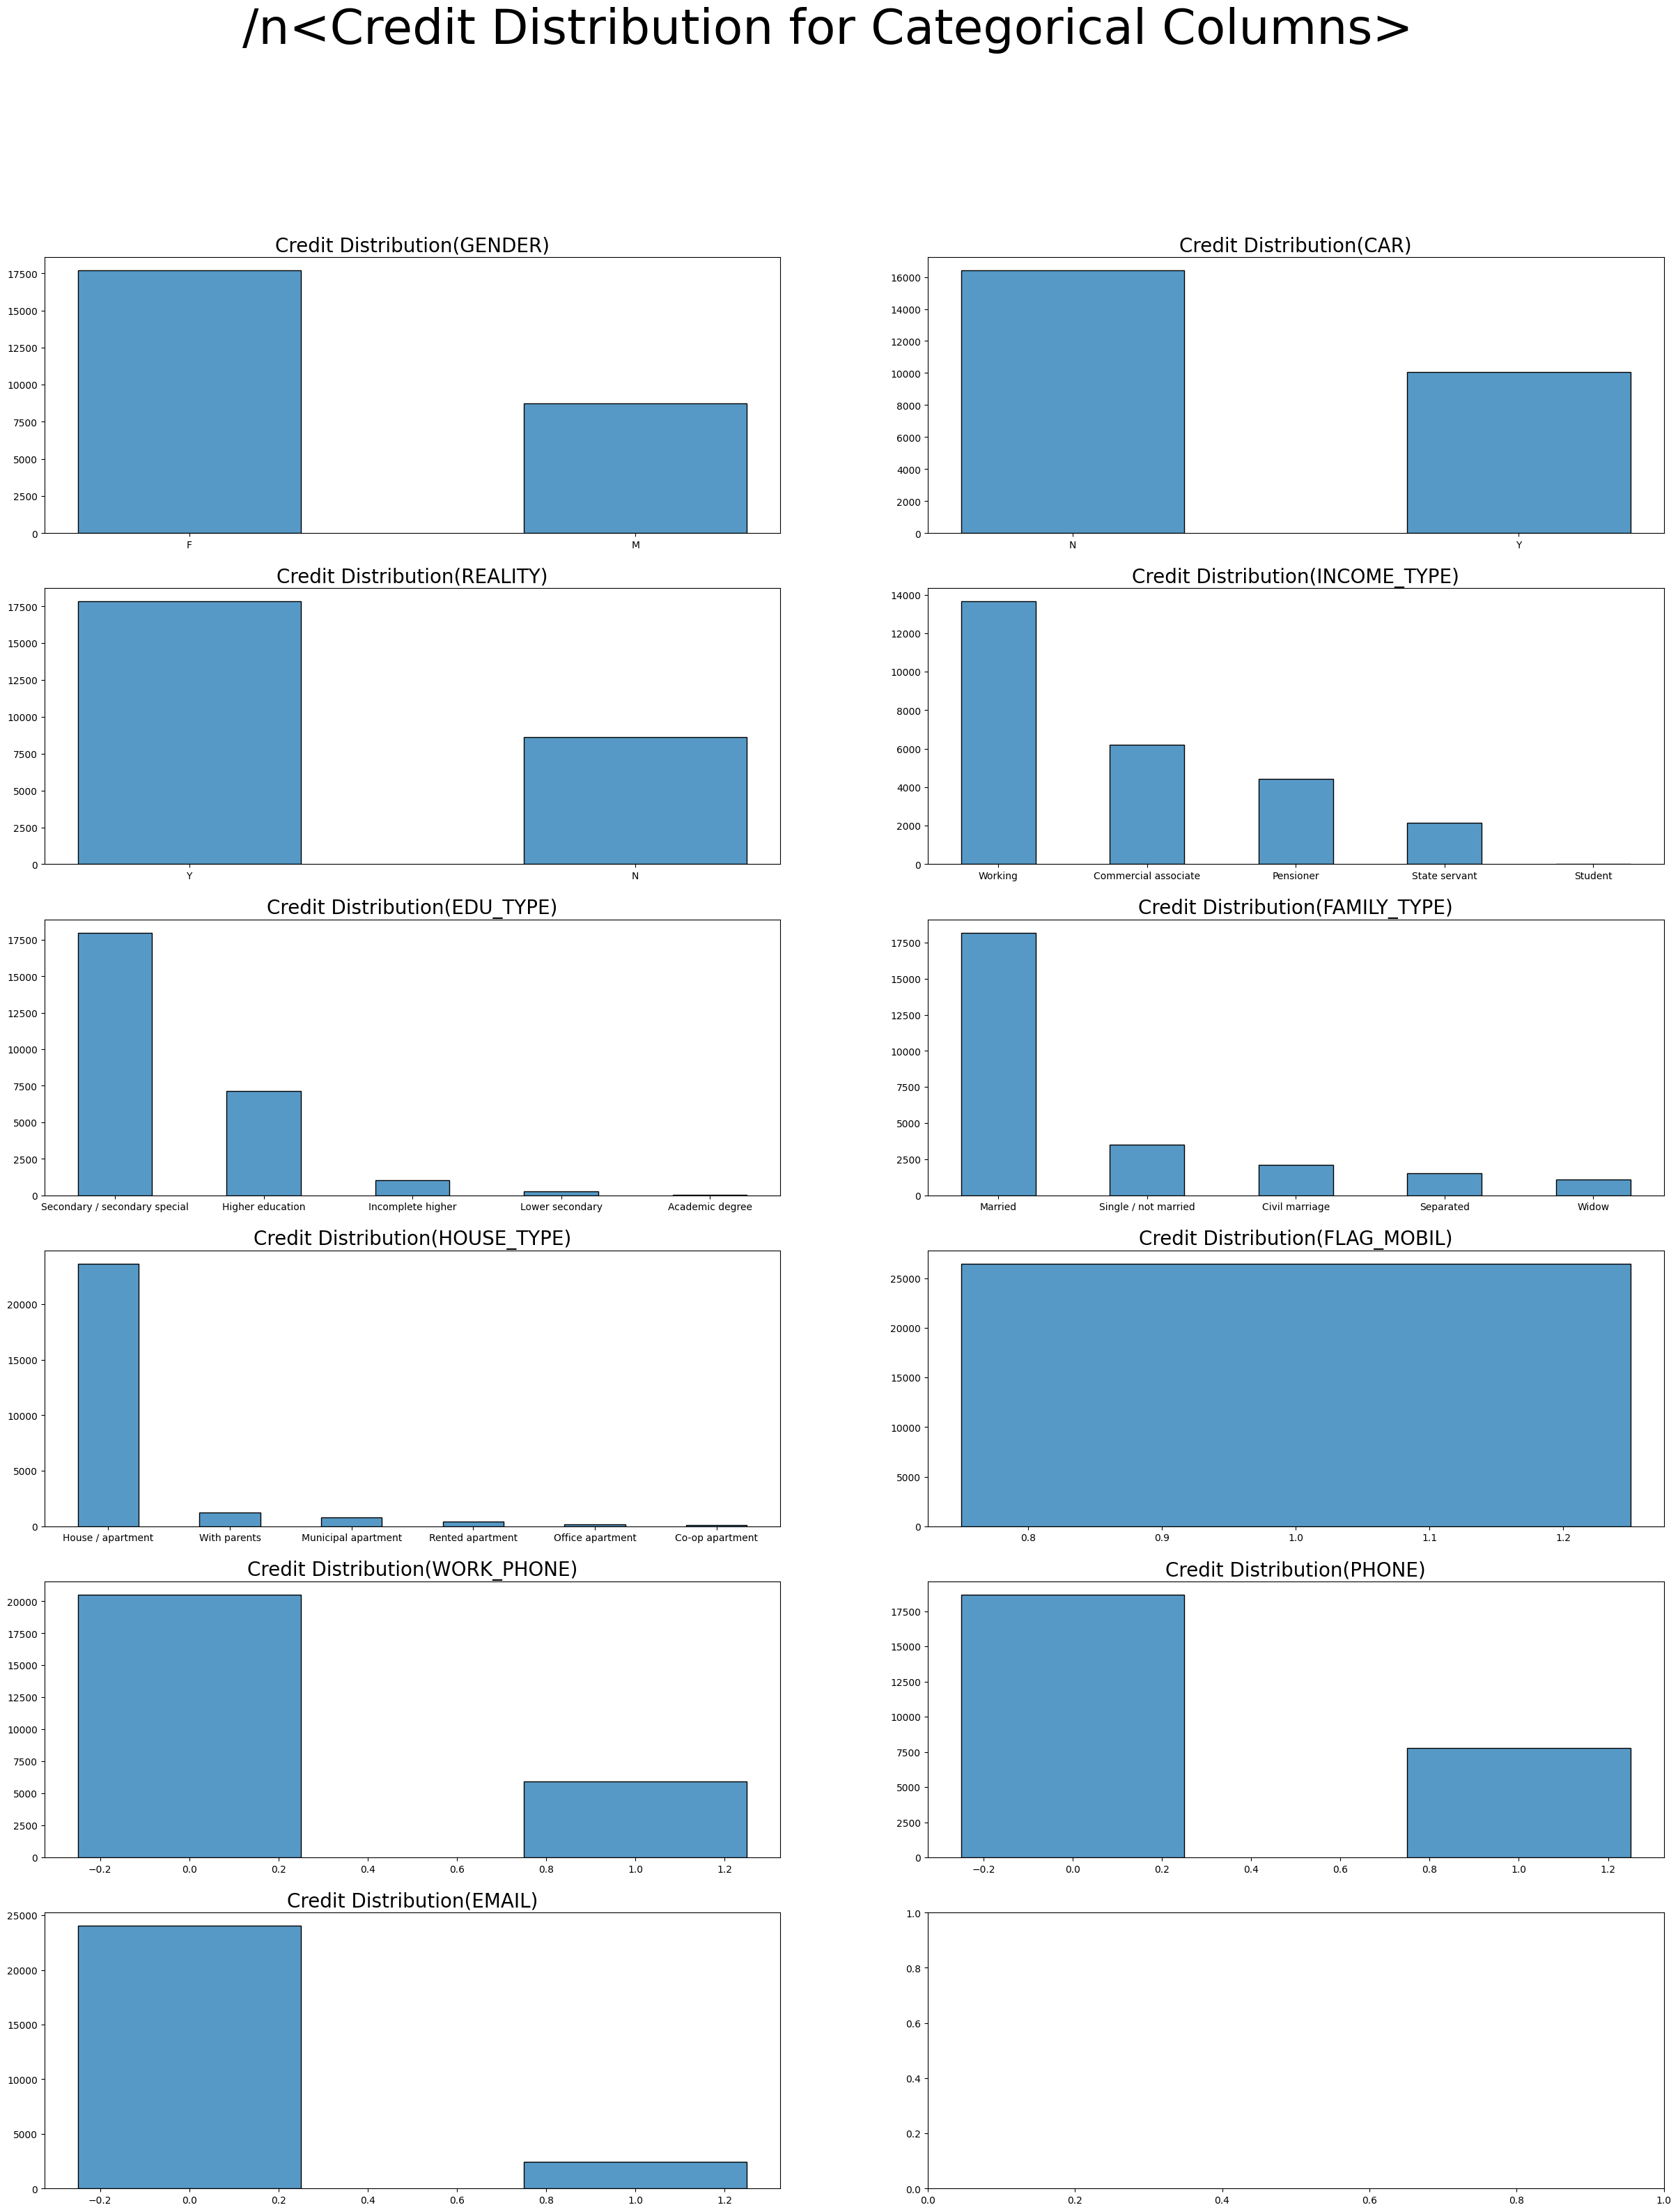

      gender car reality           income_type                       edu_type  \
0          F   N       N  Commercial associate               Higher education   
1          F   N       Y  Commercial associate  Secondary / secondary special   
2          M   Y       Y               Working               Higher education   
3          F   N       Y  Commercial associate  Secondary / secondary special   
4          F   Y       Y         State servant               Higher education   
...      ...  ..     ...                   ...                            ...   
26452      F   N       N         State servant  Secondary / secondary special   
26453      F   N       Y               Working               Higher education   
26454      F   Y       N               Working  Secondary / secondary special   
26455      M   N       Y               Working              Incomplete higher   
26456      F   N       N               Working  Secondary / secondary special   

                family_type

In [241]:
#카테고리형 데이터 EDA
# histplot

cat_EDA_cols = train_cat.columns[:-2]
fig,axes=plt.subplots(nrows=6, ncols=2, figsize=(30,36))
axes = axes.flatten()

for i, col in enumerate(cat_EDA_cols):
  ax = axes[i]
  sorted_col = train_cat[col].value_counts().sort_values(ascending=False).index
  train_cat[col]=pd.Categorical(train_cat[col], sorted_col)

  sns.histplot(data=train_cat, x=col, binwidth=0.5, shrink=0.5,
               ax=ax, multiple='dodge')
  ax.set_title(f'Credit Distribution({col.upper()})', fontsize=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.suptitle('/n<Credit Distribution for Categorical Columns>', fontsize=50)
plt.show()

In [243]:
print(train_cat)
sorted_col = train_cat['occyp_type'].value_counts().sort_values(ascending=False).index
train_cat['occyp_type']=pd.Categorical(train_cat['occyp_type'], categories=sorted_col)

      gender car reality           income_type                       edu_type  \
0          F   N       N  Commercial associate               Higher education   
1          F   N       Y  Commercial associate  Secondary / secondary special   
2          M   Y       Y               Working               Higher education   
3          F   N       Y  Commercial associate  Secondary / secondary special   
4          F   Y       Y         State servant               Higher education   
...      ...  ..     ...                   ...                            ...   
26452      F   N       N         State servant  Secondary / secondary special   
26453      F   N       Y               Working               Higher education   
26454      F   Y       N               Working  Secondary / secondary special   
26455      M   N       Y               Working              Incomplete higher   
26456      F   N       N               Working  Secondary / secondary special   

                family_type

In [245]:
bin_cols =['gender','car','reality','FLAG_MOBIL','work_phone','phone','email']

train_cat_bin = train_cat[bin_cols]
train_cat_bin['credit'] = train['credit']
train_cat_over = train_cat.drop(columns=bin_cols)

print(train_cat)

      gender car reality           income_type                       edu_type  \
0          F   N       N  Commercial associate               Higher education   
1          F   N       Y  Commercial associate  Secondary / secondary special   
2          M   Y       Y               Working               Higher education   
3          F   N       Y  Commercial associate  Secondary / secondary special   
4          F   Y       Y         State servant               Higher education   
...      ...  ..     ...                   ...                            ...   
26452      F   N       N         State servant  Secondary / secondary special   
26453      F   N       Y               Working               Higher education   
26454      F   Y       N               Working  Secondary / secondary special   
26455      M   N       Y               Working              Incomplete higher   
26456      F   N       N               Working  Secondary / secondary special   

                family_type

<ipython-input-245-bb7e70588e6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat_bin['credit'] = train['credit']


AttributeError: Rectangle.set() got an unexpected keyword argument 'shriink'

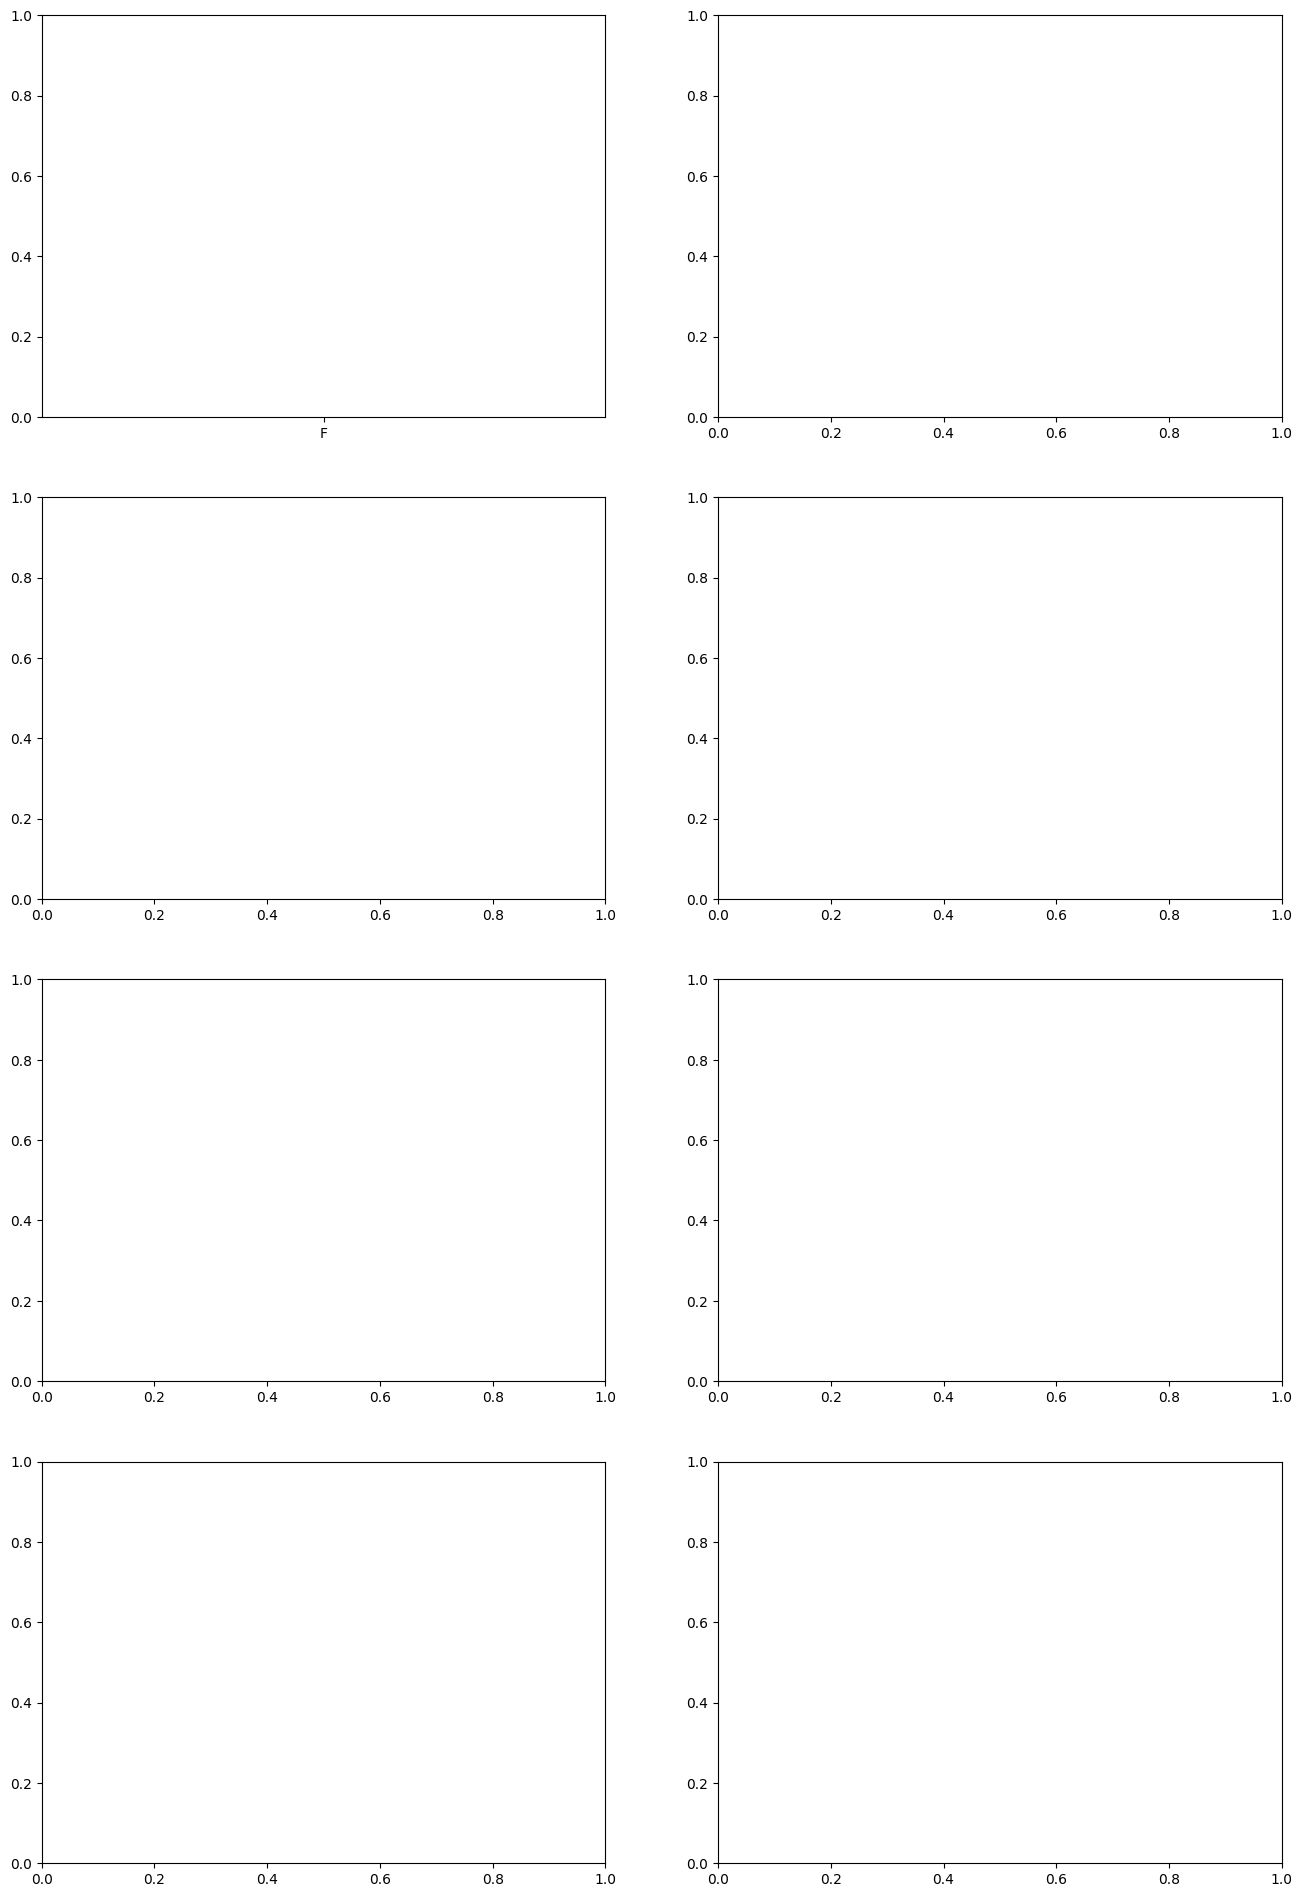

In [246]:
cat_EDA_cols = train_cat_bin.columns[:-1]
fig,axes=plt.subplots(nrows=4, ncols=2, figsize=(16,24))
axes = axes.flatten()

for i, col in enumerate(cat_EDA_cols):
  ax = axes[i]

  sns.histplot(data=train_cat_bin, x=col, hue='credit', binwidth=0.5, shriink=0.5,ax=ax, multiple='dodge', hue_order=[0,1,2])
  ax.set_title(f'Credit Distribution({col.upper()})', fontsize=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.suptitle('/n<Credit Distribution for Categorical Columns>', fontsize=50)
plt.show()

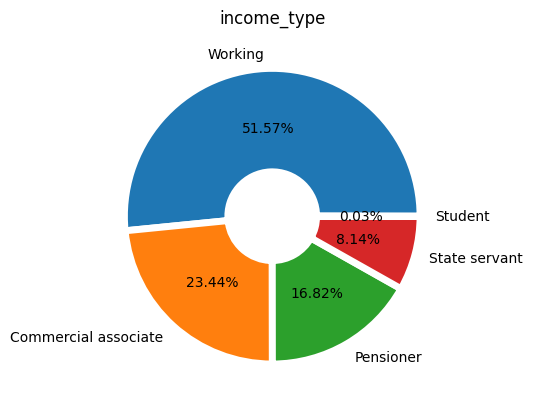

In [254]:
#piechart

ratio = train_cat_over['income_type'].value_counts()
labels = train_cat_over['income_type'].unique().categories
wedgeprops = {'width':0.7, 'edgecolor': 'w', 'linewidth':5} #Fixed typo here

plt.title('income_type')
plt.pie(x=ratio, labels=labels, autopct='%.2f%%', wedgeprops=wedgeprops)
plt.show()

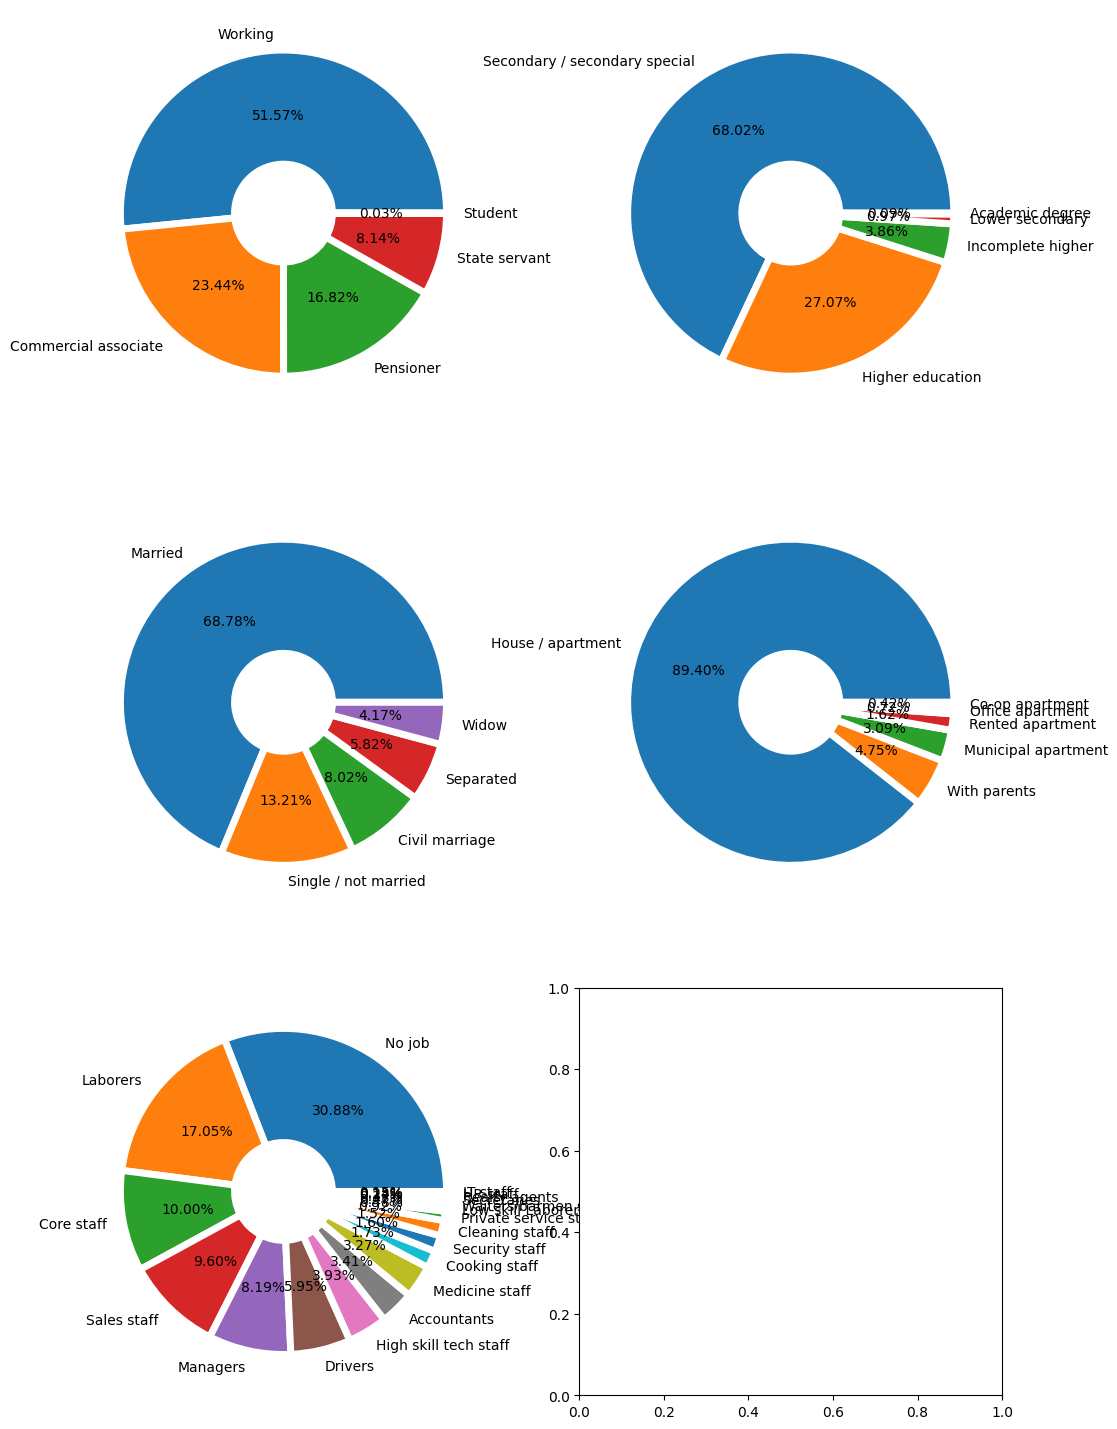

In [255]:
fig,axes=plt.subplots(3,2,figsize=(12,18))
axes = axes.flatten()
columns = train_cat_over.columns[:-1]

for i, col in enumerate(columns):
  ratio = train_cat_over[col].value_counts()
  labels = train_cat_over[col].unique().categories
  wedgeprops = {'width':0.7, 'edgecolor': 'w', 'linewidth':5}

  ax = axes[i]
  ax.pie(x=ratio, labels=labels, autopct='%.2f%%', wedgeprops=wedgeprops)
plt.show()

([], [])

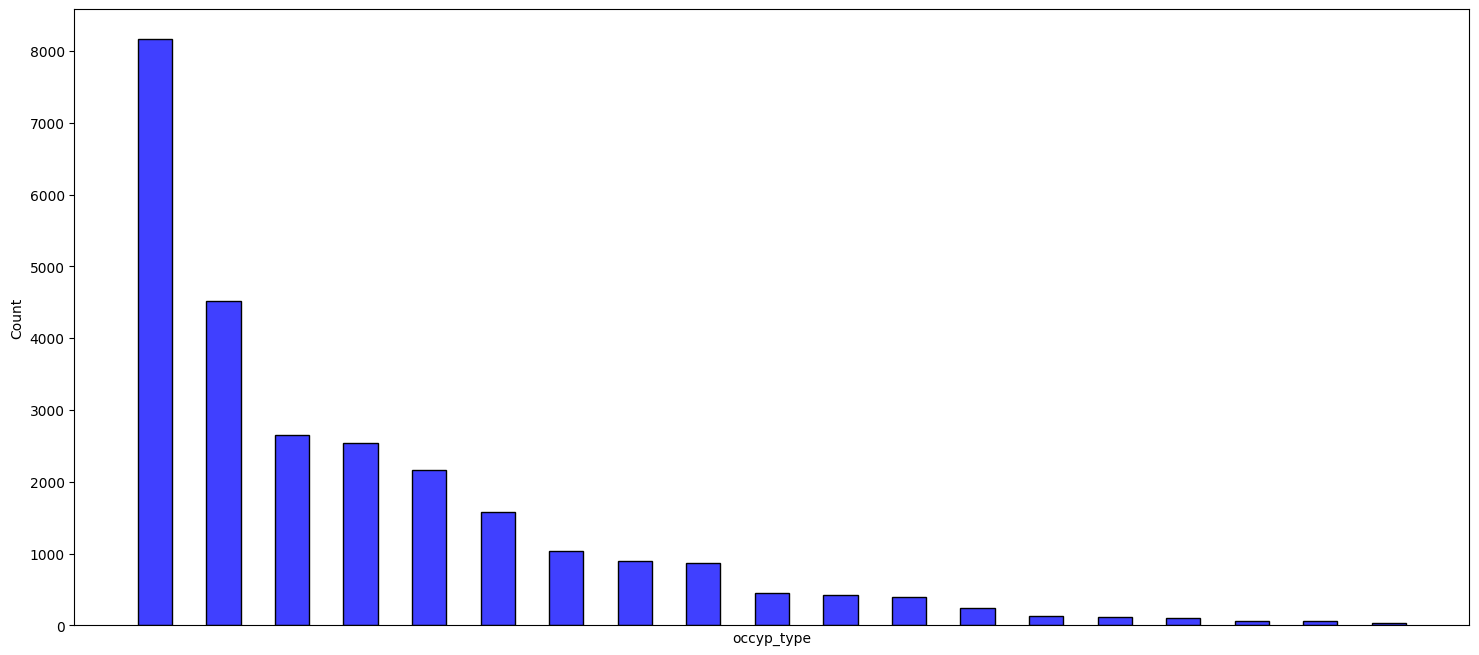

In [257]:
# occyp_type 변수 확인하기
plt.figure(figsize=(18,8))

sns.histplot(data=train_cat_over,x='occyp_type',binwidth=0.5,shrink=0.5, color='blue')
plt.xticks([])

([], [])

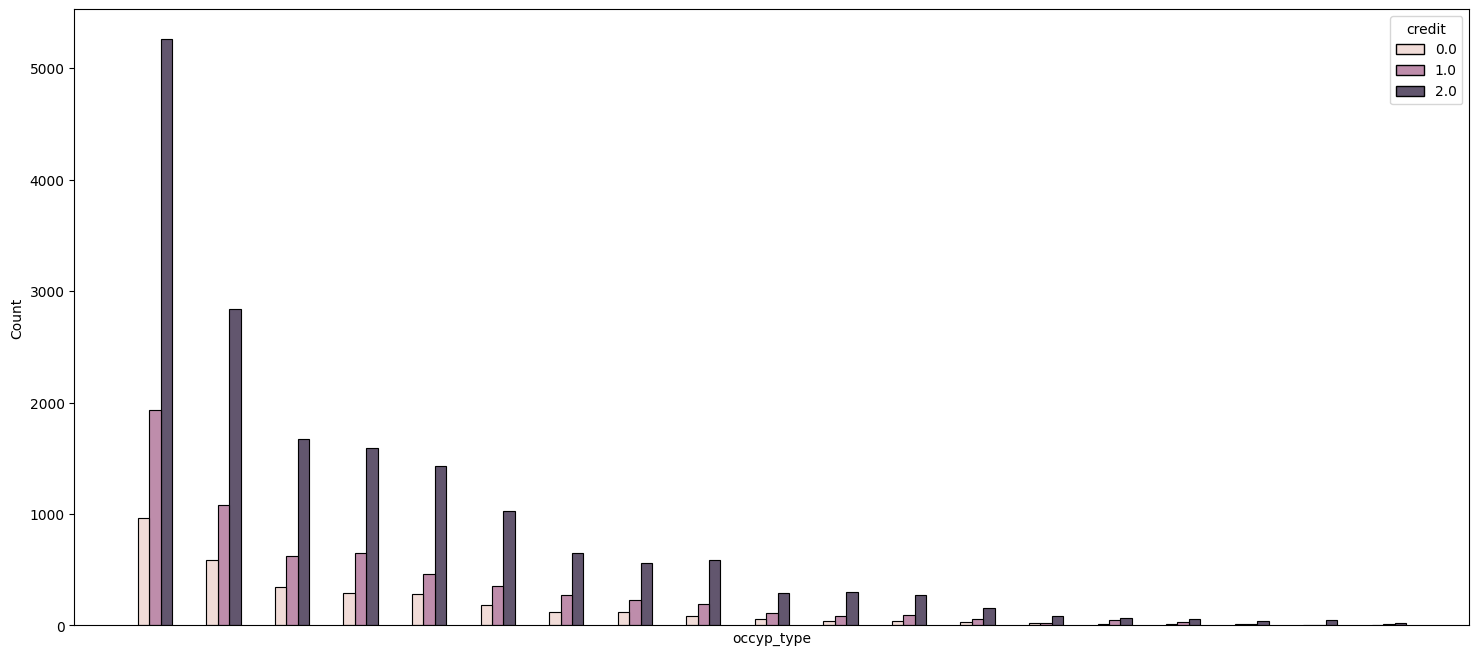

In [259]:
plt.figure(figsize=(18,8))

sns.histplot(data=train_cat_over,x='occyp_type',hue='credit',binwidth=0.5,shrink=0.5,multiple='dodge',hue_order=[0,1,2])
plt.xticks([])

In [264]:
from tabulate import tabulate

output_table=[]

occyps = train_cat_over['occyp_type'].value_counts().index

# Use occyps instead of occyp to iterate through the index
dfs=[train_cat_over[train_cat_over['occyp_type']==occyps[i]]for i in range(len(occyps))]

for i,df in enumerate(dfs):
  output_table.append([occyps[i],
                      f'{round((len(df)/len(train_cat_over))*100,2)}%', #Fixed typo here: lend(df) to len(df)
                      round(df['credit'].value_counts(normalize=True)*100,2).astype('str')+'%'])

print(tabulate(output_table, headers=['Occyp Type','Proportion','Credit Distribution'], tablefmt='grid'))

+-----------------------+--------------+---------------------------------+
| Occyp Type            | Proportion   | Credit Distribution             |
+=======================+==============+=================================+
| No job                | 30.88%       | credit                          |
|                       |              | 2.0    64.45%                   |
|                       |              | 1.0    23.72%                   |
|                       |              | 0.0    11.83%                   |
|                       |              | Name: proportion, dtype: object |
+-----------------------+--------------+---------------------------------+
| Laborers              | 17.05%       | credit                          |
|                       |              | 2.0    63.03%                   |
|                       |              | 1.0    23.98%                   |
|                       |              | 0.0    12.99%                   |
|                       |

In [3]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [5]:
# 의미없는 변수 제거
train = train.drop(['index','FLAG_MOBIL'],axis=1)
test = test.drop(['index','FLAG_MOBIL'],axis=1)

In [6]:
# 치우쳐진 데이터 처리
import matplotlib.pyplot as plt
import seaborn as sns

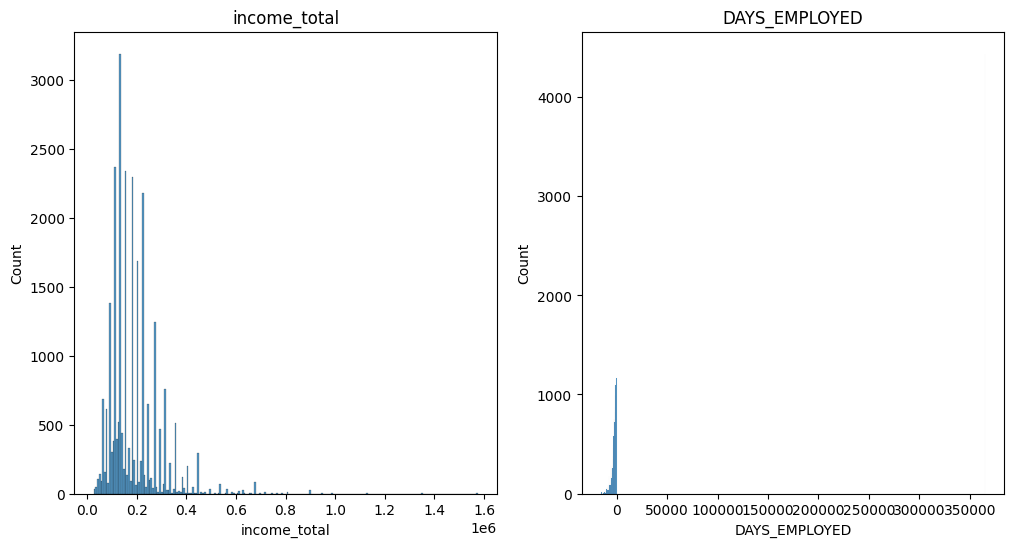

In [7]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axes= axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i,col in enumerate(columns):
  sns.histplot(data=train,x=col,ax=axes[i])
  axes[i].set_title(f'{col}')
plt.show()

In [8]:
#
from scipy.stats import skew,kurtosis

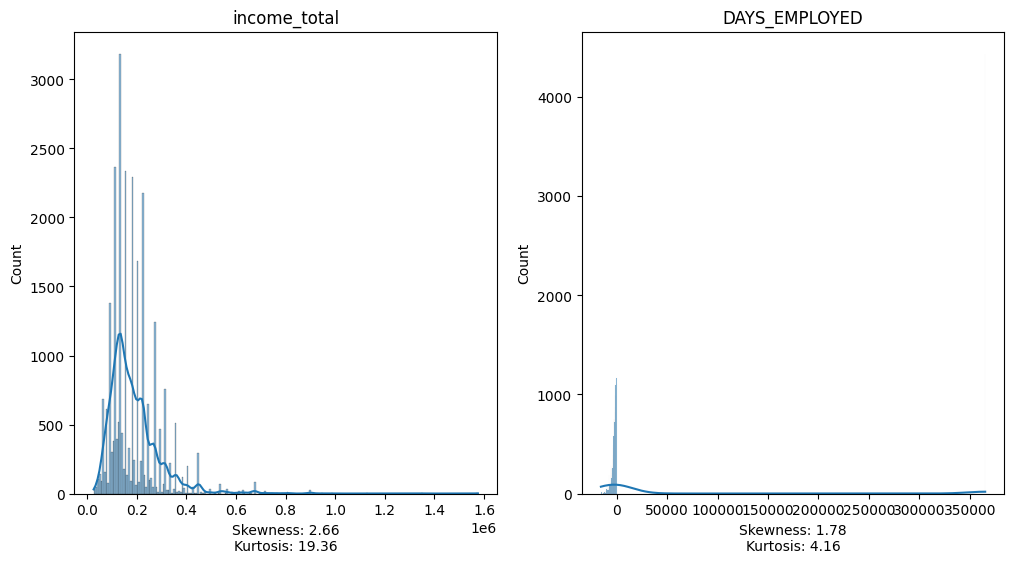

In [9]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axes= axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i,col in enumerate(columns):
  sns.histplot(data=train,x=col,ax=axes[i], kde=True)
  axes[i].set_title(f'{col}')

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f'Skewness: {round(skewness,2)}\nKurtosis: {round(kurto,2)}')
plt.show()

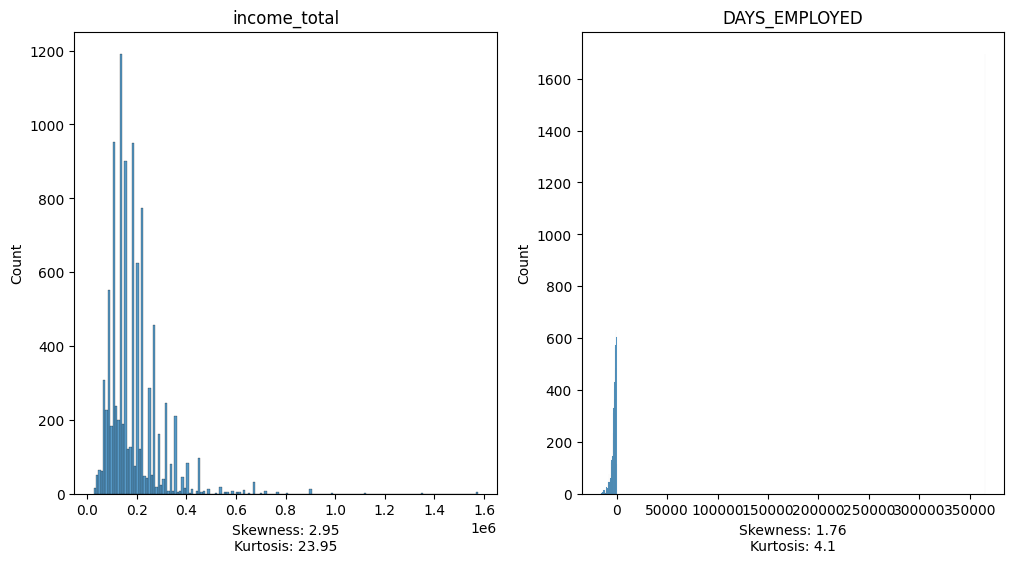

In [10]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axes=axes.flatten()
columns=['income_total','DAYS_EMPLOYED']

for i,col in enumerate(columns):
  sns.histplot(data=test,x=col,ax=axes[i])
  axes[i].set_title(f'{col}')

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f'Skewness: {round(skewness,2)}\nKurtosis: {round(kurto,2)}')
plt.show()


In [11]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


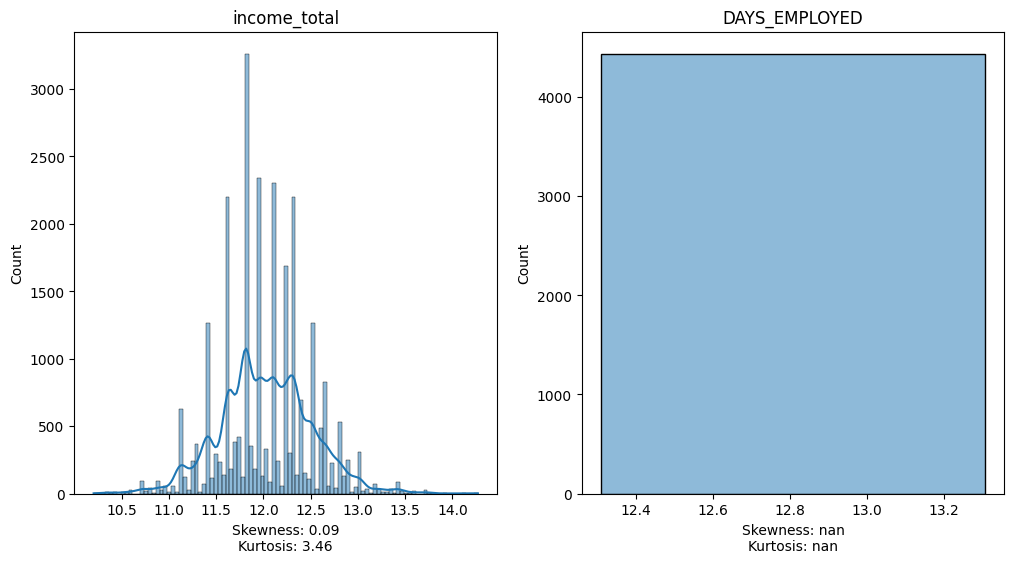

In [14]:
# income_total, DAYS_EMPLOYED변수의 히스토그램을 그리자

fig,axes= plt.subplots(1,2,figsize=(12,6))
axes=axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i,col in enumerate(columns):
  if i==1:
    data=np.log(train[col]+1)
  else:
    data=np.log(train[col])
  sns.histplot(data=data,ax=axes[i], kde=True)
  axes[i].set_title(f'{col}')

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f'Skewness: {round(skewness,2)}\nKurtosis: {round(kurto,2)}')
plt.show()

In [15]:
train['income_total'] = np.log(train['income_total'])
train['DAYS_EMPLOYED']= np.log(train['DAYS_EMPLOYED']+1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
test['income_total'] = np.log(test['income_total'])
test['DAYS_EMPLOYED']= np.log(test['DAYS_EMPLOYED']+1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
# 이상치 데이터 (범주형 변수 추가)
# 변수 child_num_over_five를 추가

train['child_num_over_five']=train['child_num']>5
test['child_num_over_five']=test['child_num']>5

In [20]:
# 중복된 행 처리
train.drop(columns='begin_month').duplicated().sum()
test.drop(columns='begin_month').duplicated().sum()

4415

In [23]:
# 신용카드 중복 발급수를 나타내는 duplicated_num변수를 추가
train_drop = train.drop(columns='begin_month')
duplicated_num = train_drop.groupby(train_drop.columns.tolist(),as_index=False).transform('size')
train['duplicated_num']=duplicated_num

IndexError: cannot do a non-empty take from an empty axes.

In [24]:
train['before_employed']=train['DAYS_BIRTH']- train['DAYS_EMPLOYED']
test['before_employed']=test['DAYS_BIRTH']- test['DAYS_EMPLOYED']

In [25]:
!pip install tabulate

In [29]:
from tabulate import tabulate
output_table = []
types = train['house_type'].value_counts().index

dfs = [train[train['house_type']==types[i]] for i in range(len(types))]

for i, df in enumerate(dfs):
    output_table.append([types[i], #indentation added here
                           f'{round((len(df)/len(train))*100,2)}%',
                           round(df['credit'].value_counts(normalize=True)*100,2).astype('str')+'%'])

print(tabulate(output_table, headers=['House Type','Proportion','Credit Distribution'], tablefmt='grid'))

+---------------------+--------------+---------------------------------+
| House Type          | Proportion   | Credit Distribution             |
+=====================+==============+=================================+
| House / apartment   | 89.4%        | credit                          |
|                     |              | 2.0    64.31%                   |
|                     |              | 1.0    23.54%                   |
|                     |              | 0.0    12.15%                   |
|                     |              | Name: proportion, dtype: object |
+---------------------+--------------+---------------------------------+
| With parents        | 4.75%        | credit                          |
|                     |              | 2.0    63.09%                   |
|                     |              | 1.0     24.9%                   |
|                     |              | 0.0    12.01%                   |
|                     |              | Name: propor

In [30]:
train['house_owner']=(train['house_type']!='Rented apratment')
test['house_owner']=(test['house_type']!='Rented apratment')

In [31]:
# 카테고리형 변수 변환
# ONE-hot encoding : 각 변수들을 이진 변수로 바꿈
# Label encoding : 카테고리 값들을 0부터 n-1까지 정수로 매핑

from sklearn.preprocessing import LabelEncoder

In [33]:
cols= train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
  train[col]=le.fit_transform(train[col])

In [34]:
cols =test.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
  test[col]=le.fit_transform(test[col])

for col in cols:
  test[col]=le.fit_transform(test[col])
#

In [35]:
#전처리 데이터 저장하기
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

In [79]:
# 앙상블 모델
# 여러 개의 기본 모델을 결합하여 더 강력하고 정확한 모델을 만드는 머신러닝 기법
# 보팅
# 배깅
# 부스팅

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train_processed.csv')
test = pd.read_csv('/content/test_processed.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [80]:
print(train['credit'].value_counts())

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


In [81]:
x = train.drop(columns = 'credit')
y = train['credit']

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)

# 사이킷런의 decisiontreeclassifier 로 모델학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score,log_loss

pred_1 = dt.predict(x_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average='weighted')
valid_precision_1 = precision_score(y_valid, pred_1, average='weighted')
valid_f1_1 = f1_score(y_valid, pred_1, average='weighted')

print('혼동행렬:', valid_cm_1)
print('/n')
print('정확도:', round(valid_acc_1*100,2))
print('재현율:', round(valid_recall_1*100,2))
print('정밀도:', round(valid_precision_1*100,2))
print('F1:', round(valid_f1_1,4))


혼동행렬: [[   2    2  640]
 [   5    1 1248]
 [   7    9 3378]]
/n
정확도: 63.89
재현율: 63.89
정밀도: 44.85
F1: 0.5015


In [77]:
# 왜 값이 다를까 정말 속상하네

In [83]:
from sklearn.metrics import classification_report

report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.14      0.00      0.01       644
         1.0       0.08      0.00      0.00      1254
         2.0       0.64      1.00      0.78      3394

    accuracy                           0.64      5292
   macro avg       0.29      0.33      0.26      5292
weighted avg       0.45      0.64      0.50      5292



In [85]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred_2 = rf.predict(x_valid)

accuracy = accuracy_score(y_valid, pred_2)
print(f'정확도: {accuracy:.4f}')

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values